<a href="https://colab.research.google.com/github/Nivethachinnasamy/Data_Science/blob/main/Task_1_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/Ice Cream.csv')

In [4]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [24]:
features=['Temperature','Revenue']
target='Revenue'

In [6]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


In [25]:
features=['Temperature','Revenue']
target='Revenue'

In [26]:
x = df [features]
y = df [target]

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)

In [34]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 2.003328046026864e-27
R² Score: 1.0


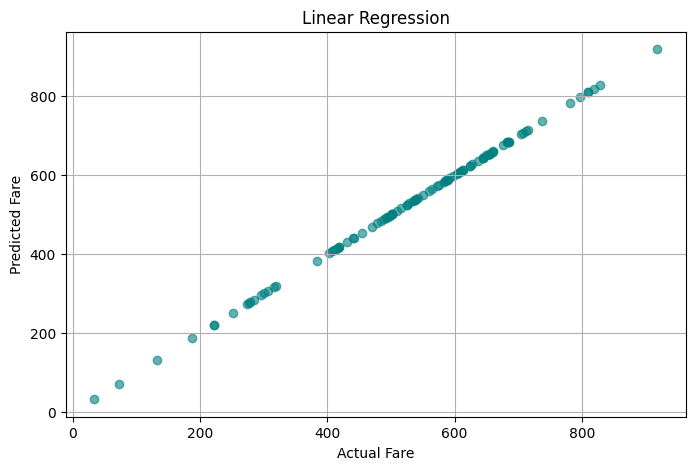

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression")
plt.grid(True)
plt.show()

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
np.random.seed(42)
temperatures = np.random.uniform(15, 35, 100)
revenue = 50 + 3 * temperatures + np.random.normal(0, 10, 100)
data = pd.DataFrame({'Temperature (°C)': temperatures, 'Revenue (USD)': revenue})

In [41]:
print(data.describe())


       Temperature (°C)  Revenue (USD)
count        100.000000     100.000000
mean          24.403615     123.200041
std            5.949788      18.791379
min           15.110442      87.380621
25%           18.864015     108.027944
50%           24.282849     121.760558
75%           29.604062     137.976384
max           34.737739     165.443951


In [42]:
print(data.isnull().sum())

Temperature (°C)    0
Revenue (USD)       0
dtype: int64


In [43]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Scatterplots')

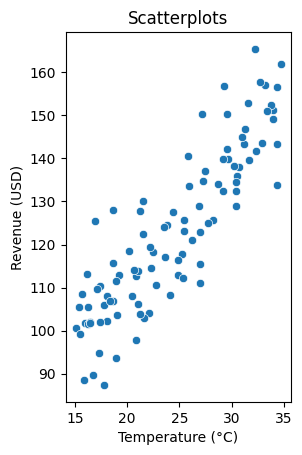

In [44]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature (°C)', y='Revenue (USD)', data=data)
plt.title('Scatterplots')

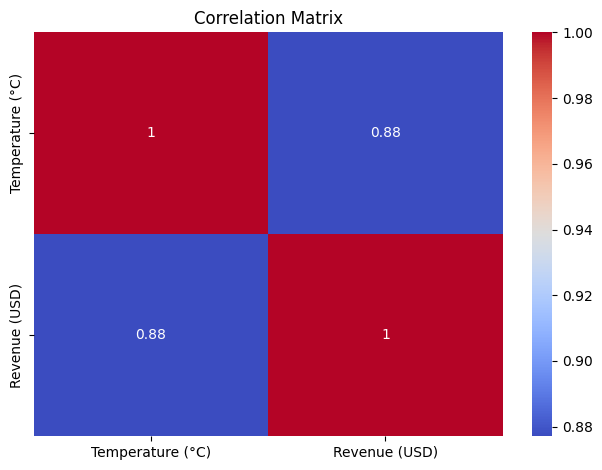

In [48]:
plt.subplot()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [51]:
X = data[['Temperature (°C)']]
y = data['Revenue (USD)']



In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)

In [55]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [56]:
y_pred_train = dt_regressor.predict(X_train)
y_pred_test = dt_regressor.predict(X_test)

In [66]:
from sklearn.tree import plot_tree

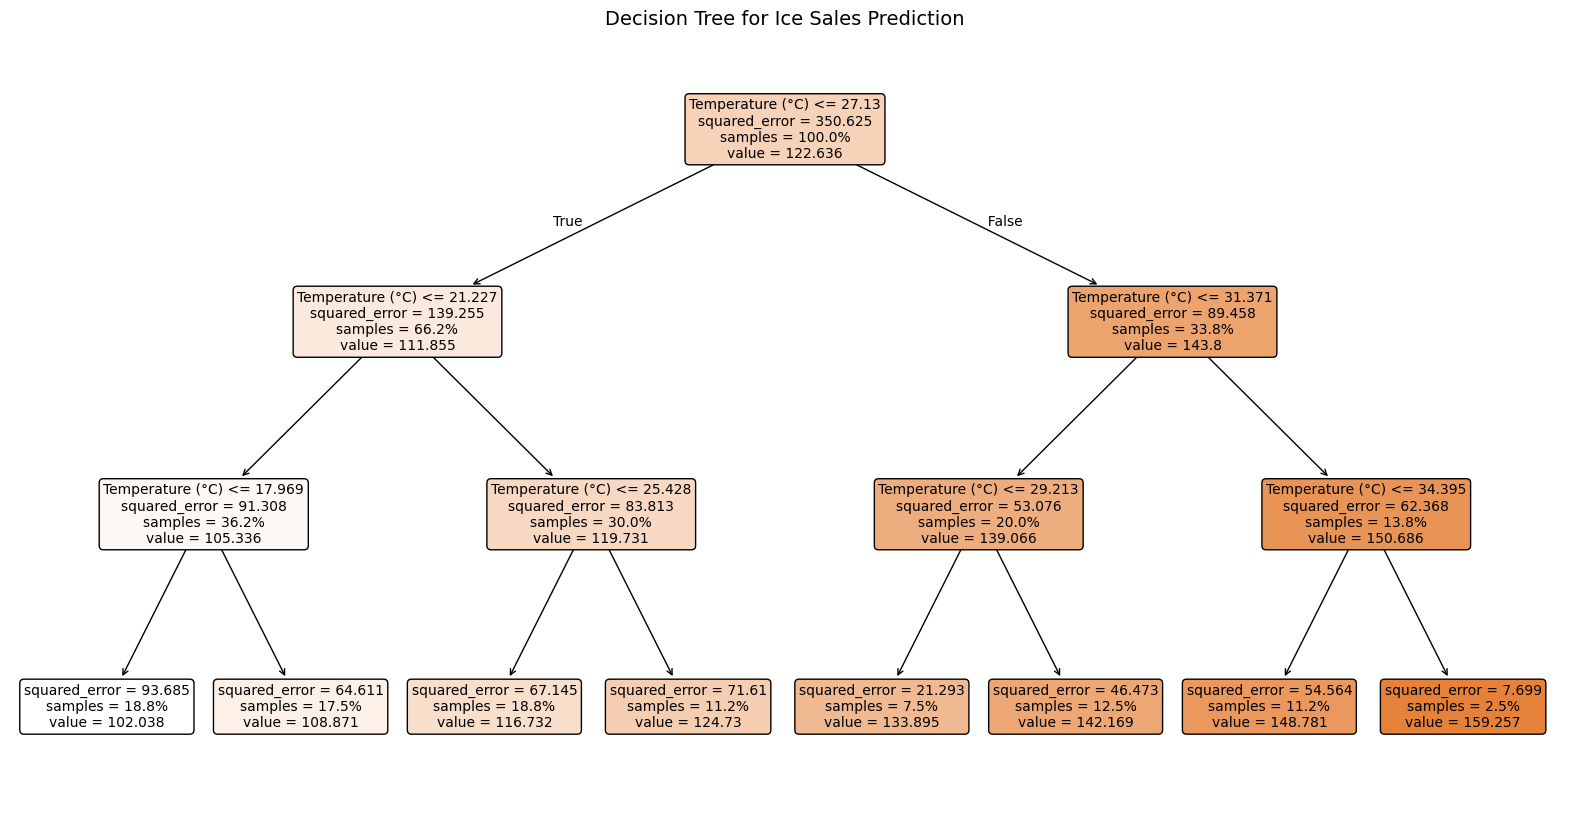

In [67]:
plt.figure(figsize=(20,10))
plot_tree(dt_regressor,
          feature_names=['Temperature (°C)'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Decision Tree for Ice Sales Prediction", fontsize=14)
plt.show()
